# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Get test and train data

In [4]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 2 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 186 rows -> systolic bp too low.
Dropped 47 rows -> systolic bp too high.
Dropped 40 rows -> diastolic bp too low.
Dropped 948 rows -> diastolic bp too high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


# Model without tuning

## Create and train the model

In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

# Evaluation

## Prediction

In [7]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

Precision Score:
0.757184371972877

Recall Score:
0.6979166666666666

F1-Score:
0.726343503174849

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2745   752
Sick        1015  2345



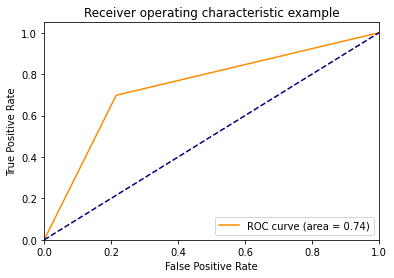


ROC Score:
0.7414376012772852


In [8]:
show_evaluation(y_test, y_pred, y_prob)

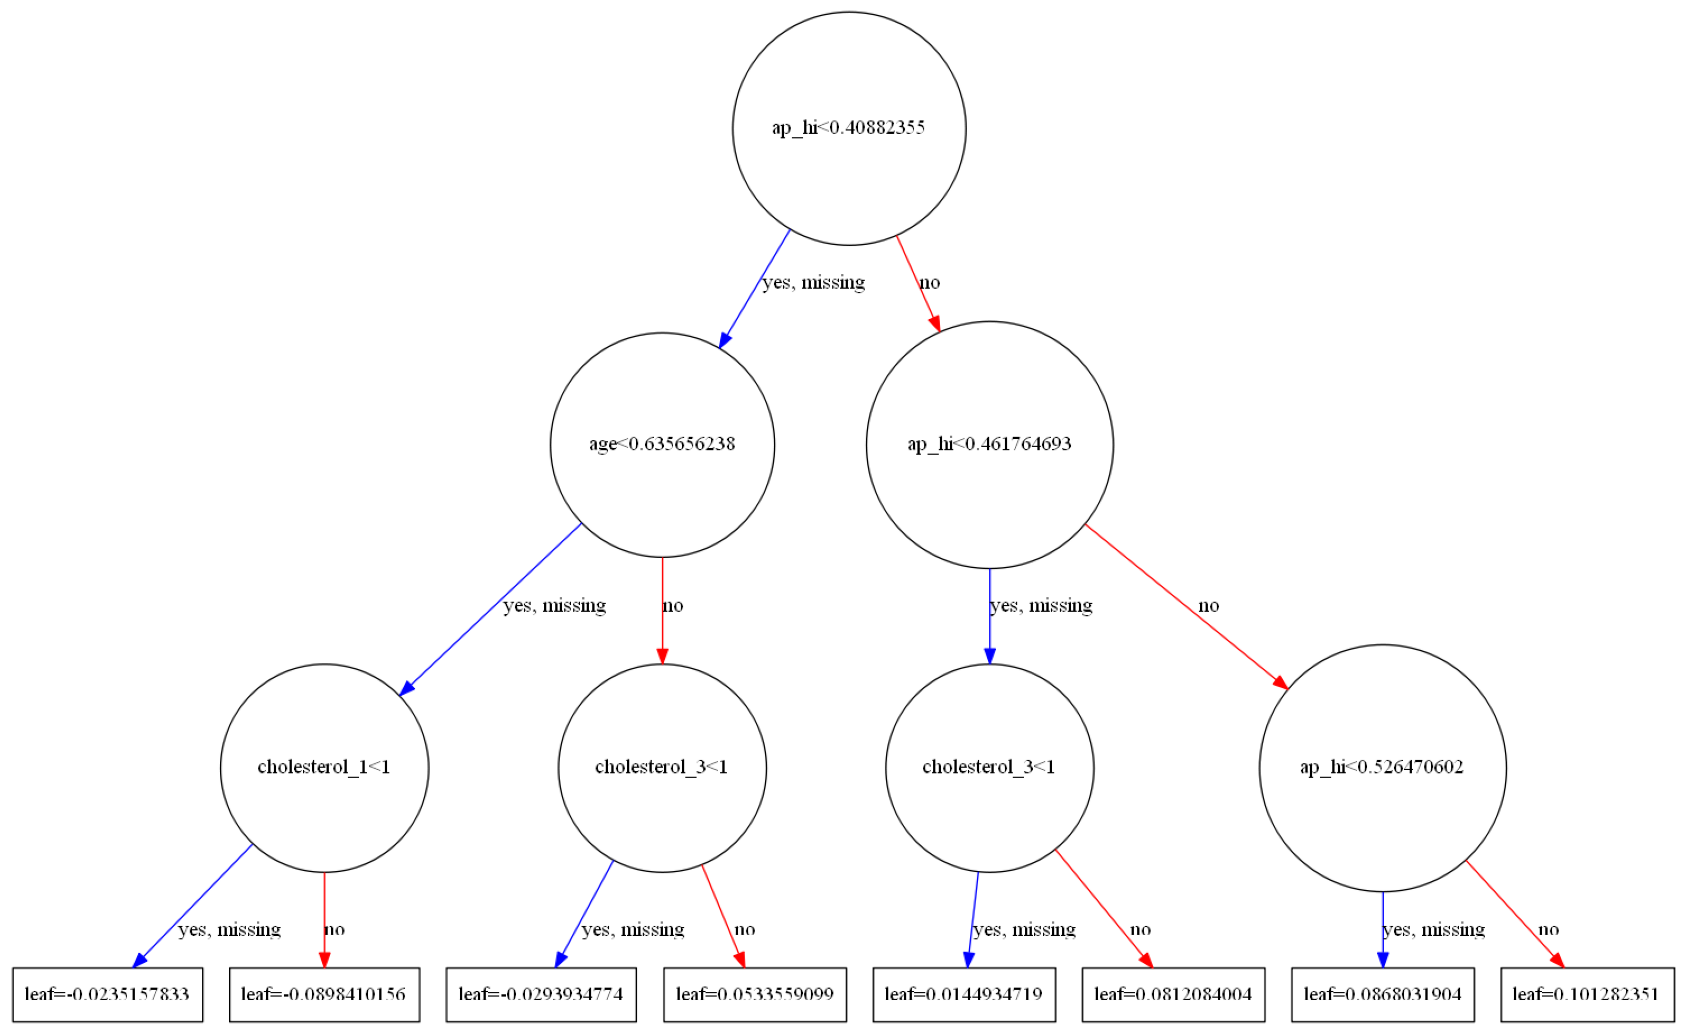

In [9]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

## Most important variables

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

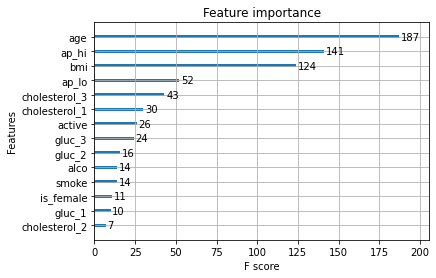

In [10]:
xgb.plot_importance(model)


# Model(s) with tuning

### Tune max_depth and min_child_weight

In [11]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 7.16148171,  7.2733994 ,  8.51005764, 10.5575583 , 11.25461602,
          8.09019814, 11.61179714, 11.20499802, 11.22619643, 15.00819674,
         14.22959681, 12.93179703]),
  'std_fit_time': array([0.08570999, 0.07472679, 0.96075484, 1.933584  , 2.23097834,
         0.08411141, 0.34649176, 0.24356978, 0.1608247 , 0.39175862,
         0.16014466, 1.26347295]),
  'mean_score_time': array([0.08600154, 0.07440171, 0.08080091, 0.08700314, 0.09320316,
         0.10220094, 0.110603  , 0.10340605, 0.1004024 , 0.11780305,
         0.11500182, 0.10920219]),
  'std_score_time': array([0.01283723, 0.00332078, 0.01124926, 0.00715464, 0.01419201,
         0.01545925, 0.02079957, 0.01494204, 0.00700391, 0.0054196 ,
         0.0077951 , 0.01339331]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [12]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([4.07499599, 3.93999748, 3.89919834, 5.35219545, 5.2271935 ,
         5.25399776, 6.64059858, 6.57919593, 5.80839982]),
  'std_fit_time': array([0.08355548, 0.06740371, 0.02751945, 0.10250138, 0.0560289 ,
         0.10910299, 0.05729843, 0.03996794, 0.99685922]),
  'mean_score_time': array([0.0660028 , 0.08320274, 0.07740111, 0.07380257, 0.06880107,
         0.07220173, 0.07480097, 0.07600303, 0.06900077]),
  'std_score_time': array([0.00565494, 0.0070517 , 0.0149507 , 0.00786127, 0.00435409,
         0.00640054, 0.00604451, 0.00442635, 0.00777271]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         

In [13]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([3.84979558, 3.87259741, 3.98439765, 3.88319602, 5.19679422,
         5.21539984, 5.13499441, 5.13879948, 6.58599868, 6.88419595,
         6.77430797, 6.60470438]),
  'std_fit_time': array([0.03390701, 0.03705571, 0.07258386, 0.11004267, 0.07187699,
         0.06271781, 0.04294815, 0.05818957, 0.26201686, 0.17063163,
         0.05080757, 0.17584882]),
  'mean_score_time': array([0.0796093 , 0.06660118, 0.06180086, 0.07020144, 0.07620363,
         0.07920108, 0.08240113, 0.06920686, 0.10340629, 0.0836072 ,
         0.08820405, 0.08780231]),
  'std_score_time': array([0.01333407, 0.00674067, 0.00664621, 0.0076265 , 0.01030558,
         0.01057398, 0.0187257 , 0.00365383, 0.01354059, 0.00850029,
         0.00941182, 0.02160142]),
  'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

### Tune gamma

In [14]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([6.62419758, 6.52199707, 6.81299734, 7.29619646, 5.71920223]),
  'std_fit_time': array([0.06461778, 0.10696565, 0.12404572, 0.19237816, 1.66359121]),
  'mean_score_time': array([0.10500584, 0.09280238, 0.08300056, 0.08960395, 0.07739906]),
  'std_score_time': array([0.02319786, 0.00722394, 0.00695435, 0.01263286, 0.02062821]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.80581676, 0.80573151, 0.80573731, 0.80573795, 0.80575028]),
  'split1_test_score': array([0.80097006, 0.80096805, 0.80112873, 0.80101347, 0.80107151]),
  'split2_test_score': array([0.80424152, 0.8042346 , 0.80395561, 0.8042097 , 0.80391827]),
  'split3_test_score': array([0.79305109, 0.79300968, 0.79308182, 0.79304409, 0.79303897]),

### Recheck model

In [15]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)

Precision Score:
0.7566784679755391

Recall Score:
0.6997023809523809

F1-Score:
0.7270759239214474

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2741   756
Sick        1009  2351



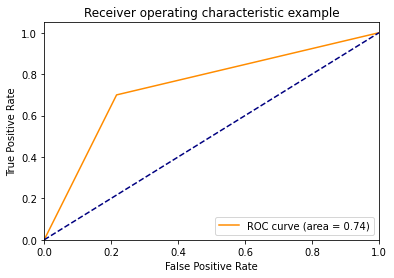


ROC Score:
0.7417585396326103


In [16]:
show_evaluation(y_test, y_pred1, y_prob1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

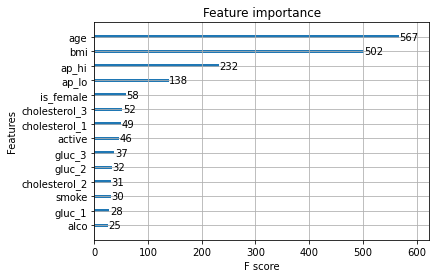

In [17]:
xgb.plot_importance(model1)

### Tune subsample and colsample_bytree

In [18]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([6.13959198, 6.12819705, 5.81639986, 5.4059947 , 6.61119881,
         6.77160091, 6.61319613, 6.09660182, 7.16300235, 6.87099757,
         6.7383985 , 6.33759651, 7.6977972 , 7.44219742, 6.95799851,
         6.58579574]),
  'std_fit_time': array([0.10112447, 0.17942042, 0.35809966, 0.10321493, 0.11907287,
         0.50223792, 0.53263382, 0.07109623, 0.07431818, 0.12268224,
         0.05608138, 0.19132397, 0.21726148, 0.22202729, 0.14073862,
         0.18941035]),
  'mean_score_time': array([0.10620413, 0.09200354, 0.09240198, 0.08980212, 0.08480124,
         0.08060226, 0.08900719, 0.0881999 , 0.07499876, 0.09480224,
         0.08320332, 0.07640185, 0.0898037 , 0.07640204, 0.08220792,
         0.07200203]),
  'std_score_time': array([0.01426064, 0.01126031, 0.01044218, 0.01370191, 0.00788537,
         0.00739329, 0.01207245, 0.00906608, 0.00532155, 0.0108737 ,
         0.01055366, 0.00628073, 0.01420386, 0.00338131, 0.00527371,
         0.01318977]),
  'param_c

In [19]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([5.71159673, 5.57219448, 5.46039762, 5.85839586, 6.00499625,
         5.69259677, 6.04959879, 5.9463985 , 5.01779637]),
  'std_fit_time': array([0.05391521, 0.04214997, 0.06166209, 0.13838441, 0.18494895,
         0.17904726, 0.02227585, 0.04136013, 1.44120758]),
  'mean_score_time': array([0.10880423, 0.09780221, 0.09300351, 0.08300366, 0.07740312,
         0.07740345, 0.07980065, 0.08140063, 0.06640215]),
  'std_score_time': array([0.02144305, 0.01507964, 0.0147393 , 0.01360759, 0.00682852,
         0.00765786, 0.0104198 , 0.00781408, 0.01290974]),
  'param_colsample_bytree': masked_array(data=[0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.75, 0.75, 0.75],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, False, False, False, False, False, Fals

### Tune regularization parameters

In [20]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=70, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([3.05419445, 3.04579625, 3.05299358, 3.08339777, 2.58079691]),
  'std_fit_time': array([0.02202798, 0.0251215 , 0.0273364 , 0.03146172, 0.69472039]),
  'mean_score_time': array([0.07540107, 0.06160178, 0.0686018 , 0.06300492, 0.05220151]),
  'std_score_time': array([0.0164124 , 0.00445471, 0.01300115, 0.00616927, 0.01195902]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.80537152, 0.80532016, 0.80505384, 0.80498279, 0.80215112]),
  'split1_test_score': array([0.80078526, 0.80076602, 0.80075881, 0.80079863, 0.79784391]),
  'split2_test_score': array([0.80419957, 0.80436722, 0.80437306, 0.80418587, 0.80087013]),
  'split3_test_score': array([0.79412354, 0.79412328, 0.79410538,

In [21]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([5.99459352, 5.81580043, 5.82959771, 5.91539907, 4.93999586]),
  'std_fit_time': array([0.10085167, 0.10343718, 0.06830226, 0.07888508, 1.4944714 ]),
  'mean_score_time': array([0.10540304, 0.08499918, 0.09040108, 0.09960499, 0.08800306]),
  'std_score_time': array([0.01443164, 0.01164687, 0.01414992, 0.01685829, 0.0300612 ]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05}],
  'split0_test_score': array([0.8053442 , 0.80535221, 0.80539572, 0.80539611, 0.80545117]),
  'split1_test_score': array([0.80103521, 0.80103512, 0.80103527, 0.80093705, 0.80099338]),
  'split2_test_score': array([0.80444751, 0.80444772, 0.80462036, 0.80462726, 0.80446041]),
  'split3_test_score': array([0.79423956, 0.79423953, 0.794

### Recheck model

In [22]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)

Precision Score:
0.7580071174377224

Recall Score:
0.6973214285714285

F1-Score:
0.7263990079057511

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2749   748
Sick        1017  2343



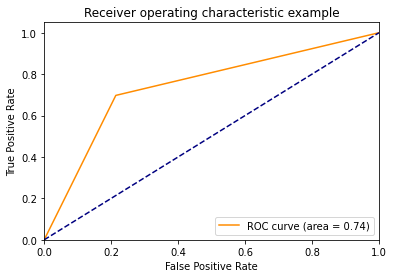


ROC Score:
0.7417119010171984


In [23]:
show_evaluation(y_test, y_pred2, y_prob2)

### Change learning rate

In [24]:
model3 = XGBClassifier( 
    learning_rate=0.01, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model3.fit(x_train,y_train)


y_prob3 = model3.predict(x_test.astype('float32'))
y_pred3 = np.round(y_prob3)

Precision Score:
0.765146358066712

Recall Score:
0.669047619047619

F1-Score:
0.7138774214036201

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2807   690
Sick        1112  2248



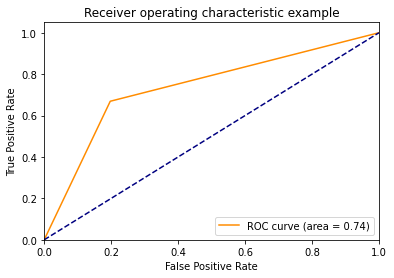


ROC Score:
0.7358678186745101


In [25]:
show_evaluation(y_test, y_pred3, y_prob3)